In [2]:
# Algunas bibliotecas que ocuparemos
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from numpy.linalg import *
import pylab
from sklearn import datasets


![](iris.png)

In [3]:
iris = datasets.load_iris()
data = iris.data[:100]
target = iris.target[:100]
data = (data - data.min(axis=0))/(data.max(axis=0)-data.min(axis=0))
P =len(data)

idx = np.random.permutation(P)
data_training = data[idx[:int(P*.8)]]
target_training = target[idx[:int(P*.8)]]

data_testing = data[idx[int(P*.8):]]
target_testing = target[idx[int(P*.8):]]


print(data, '\n\n')
print(data_testing)


[[0.2962963  0.625      0.09756098 0.05882353]
 [0.22222222 0.41666667 0.09756098 0.05882353]
 [0.14814815 0.5        0.07317073 0.05882353]
 [0.11111111 0.45833333 0.12195122 0.05882353]
 [0.25925926 0.66666667 0.09756098 0.05882353]
 [0.40740741 0.79166667 0.17073171 0.17647059]
 [0.11111111 0.58333333 0.09756098 0.11764706]
 [0.25925926 0.58333333 0.12195122 0.05882353]
 [0.03703704 0.375      0.09756098 0.05882353]
 [0.22222222 0.45833333 0.12195122 0.        ]
 [0.40740741 0.70833333 0.12195122 0.05882353]
 [0.18518519 0.58333333 0.14634146 0.05882353]
 [0.18518519 0.41666667 0.09756098 0.        ]
 [0.         0.41666667 0.02439024 0.        ]
 [0.55555556 0.83333333 0.04878049 0.05882353]
 [0.51851852 1.         0.12195122 0.17647059]
 [0.40740741 0.79166667 0.07317073 0.17647059]
 [0.2962963  0.625      0.09756098 0.11764706]
 [0.51851852 0.75       0.17073171 0.11764706]
 [0.2962963  0.75       0.12195122 0.11764706]
 [0.40740741 0.58333333 0.17073171 0.05882353]
 [0.2962963  

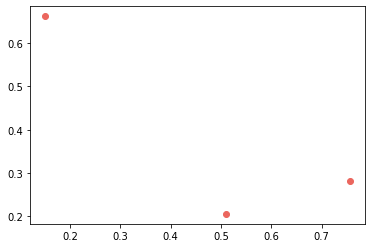

In [4]:
colors = "bgrcmykw"
plt.plot(np.random.random(3), np.random.random(3), 'o', c=np.random.rand(3))
plt.show()

[[0.62062062 0.33333333 0.80751483 0.73608903]
 [0.26959518 0.59883721 0.11344299 0.07934337]]
[0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 1]
data training:  80
mu:  2
idx:  80


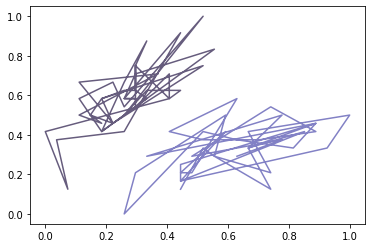

In [5]:

mu, idx = kmeans2(data_training, 2)
print (mu)
print (idx)

print('data training: ',len(data_training))
print('mu: ',len(mu))
print('idx: ',len(idx))

for i in range(2):
    
    my_set = data_training[idx==i]
    plt.plot(my_set[:,0], my_set[:,1], '-', c=np.random.rand(3))
    


fu:
 [3.38400712 4.4160919  5.49062167 3.14093876 3.25931241 3.49342374
 4.33892593 3.25147099 3.95638362 2.82761314]
fx:
 [3.18605957 4.74594751 4.05987064 2.79266062 3.82701323 4.33581729
 2.84742073 2.47175317 3.8478191  3.68118065]
idx: [False  True False False  True  True False False False  True]

fu:
 [4.96871168 3.6569038  3.99761196 4.97336923 2.76034656 3.56884644
 5.49523146 3.30955726 3.87767737 5.66995695]
fx:
 [3.18605957 4.4160919  4.05987064 2.79266062 3.25931241 3.49342374
 2.84742073 2.47175317 3.8478191  2.82761314]
idx: [False  True  True False  True False False False False False]

fu:
 [4.68589471 3.79659054 3.97239582 2.0383448  3.47856848 2.26685079
 2.08238744 3.70032851 4.32568335 3.46959346]
fx:
 [3.18605957 3.6569038  3.99761196 2.79266062 2.76034656 3.49342374
 2.84742073 2.47175317 3.8478191  2.82761314]
idx: [False False  True  True False  True  True False False False]

fu:
 [3.40226589 1.94051735 4.23753311 2.87399739 3.12376992 2.70888832
 3.1341503  2.1

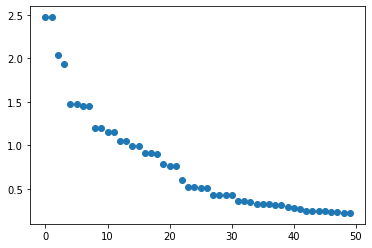

In [9]:
def f(x):
    return np.sum(x*x, axis=1)
lb = -1.5
ub = 2.0
N = 10
n = 10
t = 0
G = 50
CR = 0.8
F = 0.5

x = np.random.random((N,n))
u = np.zeros((N,n))
fx = f(x)

conv = []
while(t < G):
    for i in range(N):
        [r1, r2, r3] = np.random.permutation(N)[:3]
        irand = np.random.randint(n)
        for j in range(n):
            if np.random.random() < CR or j == irand:
                u[i,j] = x[r3,j] + F * (x[r1,j] - x[r2,j])
                if u[i,j] < lb or u[i,j] > ub:
                    u[i,j] = (x[r1,j] + x[r2,j] + x[r3,j])/3.0
            else:
                u[i,j] = x[i,j]
    #print('\nu:\n',u)
    fu = f(u)
    print('\nfu:\n',fu)
    print('fx:\n',fx)

    idx = fu < fx
    print('idx:', idx)
    fx[idx] = fu[idx]
    x[idx] = u[idx]
    conv.append(np.min(fx))
    
    t += 1

print(np.min(fx))
plt.scatter(range(G), conv)


In [76]:
print (np.random.permutation(N)[:3])

[6 4 8]


In [77]:
u = np.zeros((N,n))
print (u)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


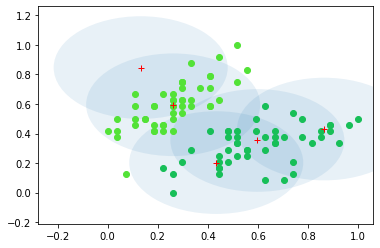

In [51]:
def compute_sigmas(patterns, J):
    mu, idx = kmeans2(patterns, J)
    sigma = []
    for j in range(J):
        idx = np.argsort(np.sqrt(np.sum((mu[0] - mu) ** 2.0, axis =1 )))
        sigma.append((mu[idx[1], :] + mu[idx[2], :])/2.0)
    return mu, np.array(sigma)

J = 5


mu, sigma = compute_sigmas (data, J)
axes = plt.axes()

plt.plot(data[:50,0], data[:50,1], 'o', c=np.random.rand(3))
plt.plot(data[50:100,0], data[50:100,1], 'o', c=np.random.rand(3))


for i in range(J):
    plt.plot(mu[i,0], mu[i,1], '+', c='r')
    circle2 = pylab.Circle(mu[i], radius = sigma[i,0], alpha = .1)
    axes.add_patch(circle2)
    
